<a href="https://colab.research.google.com/github/andreuartigues/Deep-Learning/blob/main/XOR_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
import numpy as  np

## 1. The XOR data


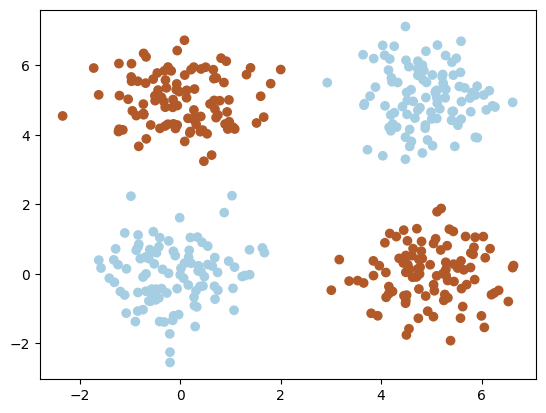

In [14]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

## Layers

In [3]:
binary_logistic_regressor = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),
    layers.Dense(units=4, activation="sigmoid", name="hidden"),
    layers.Dense(units=2, activation="softmax", name="output")
])
binary_logistic_regressor.compile(optimizer='sgd',
                                  loss= tf.keras.losses.sparse_categorical_crossentropy,
                                  metrics=['accuracy'])

## SQD

In [4]:
binary_logistic_regressor.compile(optimizer='sgd',
                                  loss= tf.keras.losses.sparse_categorical_crossentropy,
                                  metrics=['accuracy'])

## Training

In [5]:
 binary_logistic_regressor.fit(X, y, epochs=100, verbose=0, validation_split = 0.2)

## Plot decision boundary

10020/10020 [==============================] - 9s 856us/step


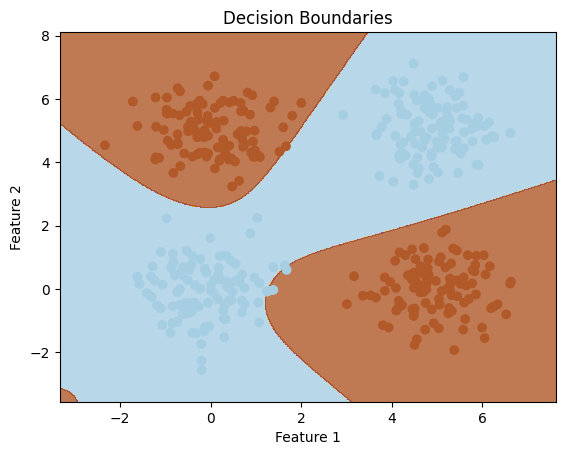

In [21]:
# Create a mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the class for each grid point
Z = binary_logistic_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()